# Task_4-10

## Table of contents
#### 1. PII(personally identifiable information) issue 
#### 2. Regional analysis
#### 3. Activity Customer flag
#### 4. Customer profile
#### 5. Customer profile and department
#### 6. Distributions by profiles
#### 7. Customer profile and expenditure 
#### 8. Customer profile with regions and department
#### 9. Exporting dataframe for Tableau

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'C:\Users\jinu5\Desktop\careerfoundry\Achivement 4\Instacart Basket Analysis_2024-01-02'

In [3]:
insta_filtered=pd.read_pickle(os.path.join(path, '02 Data\Prepared Data\insta_filtered.pkl'))

### 1. PII
This data frame contain PII data like names, emails, gemder, marriages, dependents, incomes

### 2. Regional analysis
Create a regional segmentation of the data and Determine whether there’s a difference in spending habits between the different U.S. regions.

#### creating regions

In [5]:
insta_cleaned.loc[(insta_cleaned['STATE'] =='Maine') 
                  | (insta_cleaned['STATE'] == 'New Hampshire') 
                  | (insta_cleaned['STATE'] == 'Vermont')
                  | (insta_cleaned['STATE'] == 'Massachusetts')
                  | (insta_cleaned['STATE'] == 'Rhode Island')
                  | (insta_cleaned['STATE'] == 'Connecticut')
                  | (insta_cleaned['STATE'] == 'New York')
                  | (insta_cleaned['STATE'] == 'Pennsylvania')
                  | (insta_cleaned['STATE'] == 'New Jersey'), 'Region'] = 'Northeast'

In [6]:
insta_cleaned.loc[(insta_cleaned['STATE'] =='Wisconsin') 
                  | (insta_cleaned['STATE'] == 'Michigan') 
                  | (insta_cleaned['STATE'] == 'Illinois')
                  | (insta_cleaned['STATE'] == 'Indiana')
                  | (insta_cleaned['STATE'] == 'Ohio')
                  | (insta_cleaned['STATE'] == 'North Dakota')
                  | (insta_cleaned['STATE'] == 'South Dakota')
                  | (insta_cleaned['STATE'] == 'Nebraska') 
                  | (insta_cleaned['STATE'] == 'Kansas')
                  | (insta_cleaned['STATE'] == 'Minnesota')
                  | (insta_cleaned['STATE'] == 'Iowa')
                  | (insta_cleaned['STATE'] == 'Missouri'), 'Region'] = 'Midwest'

In [7]:
insta_cleaned.loc[(insta_cleaned['STATE'] =='Delaware') 
                  | (insta_cleaned['STATE'] == 'Maryland') 
                  | (insta_cleaned['STATE'] == 'District of Columbia')
                  | (insta_cleaned['STATE'] == 'Virginia')
                  | (insta_cleaned['STATE'] == 'West Virginia')
                  | (insta_cleaned['STATE'] == 'North Carolina')
                  | (insta_cleaned['STATE'] == 'South Carolina')
                  | (insta_cleaned['STATE'] == 'Georgia')
                  | (insta_cleaned['STATE'] == 'Florida') 
                  | (insta_cleaned['STATE'] == 'Kentucky')
                  | (insta_cleaned['STATE'] == 'Tennessee')
                  | (insta_cleaned['STATE'] == 'Mississippi') 
                  | (insta_cleaned['STATE'] == 'Alabama')
                  | (insta_cleaned['STATE'] == 'Oklahoma')
                  | (insta_cleaned['STATE'] == 'Texas')
                  | (insta_cleaned['STATE'] == 'Arkansas')
                  | (insta_cleaned['STATE'] == 'Louisiana'), 'Region'] = 'South'

In [8]:
insta_cleaned.loc[(insta_cleaned['STATE'] =='Idaho') 
                  | (insta_cleaned['STATE'] == 'Montana') 
                  | (insta_cleaned['STATE'] == 'Wyoming')
                  | (insta_cleaned['STATE'] == 'Nevada')
                  | (insta_cleaned['STATE'] == 'Utah')
                  | (insta_cleaned['STATE'] == 'Colorado')
                  | (insta_cleaned['STATE'] == 'Arizona')
                  | (insta_cleaned['STATE'] == 'New Mexico') 
                  | (insta_cleaned['STATE'] == 'Alaska')
                  | (insta_cleaned['STATE'] == 'Washington')
                  | (insta_cleaned['STATE'] == 'Oregon') 
                  | (insta_cleaned['STATE'] == 'California')
                  | (insta_cleaned['STATE'] == 'Hawaii')
                  , 'Region'] = 'West'

In [3]:
# value count by regions
insta_cleaned['Region'].value_counts()

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [44]:
insta_cleaned['Region'].describe()

count     32404859
unique           4
top          South
freq      10791885
Name: Region, dtype: object

In [46]:
insta_cleaned['Region'].isnull().sum()

0

In [51]:
# crossing the variable Region with the spending flag
region_flag_counts = insta_cleaned.groupby(['Region', 'spending_flag']).size().unstack(fill_value=0)


In [48]:
region_flag_counts

spending_flag,High spender,Low spender
Region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [ ]:
# crossing the variable Region with the spending flag
crosstab = pd.crosstab(insta_cleaned['Region'], insta_cleaned['spending_flag'], dropna = False)

In [ ]:
# export crossing data to excel
crosstab.to_clipboard()

#### data from excel
 in the Excel, I added % of each spender in each region

 - original data 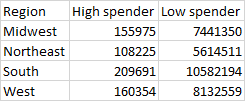
 - with % : 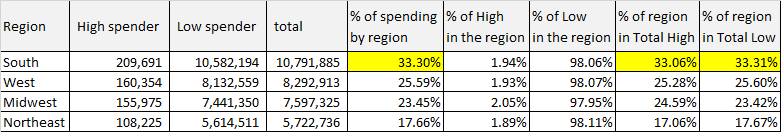
Region	 High spender 	 Low spender 	 total 	"% of spending
by region"	"% of High 
in the region"	"% of Low 
in the region"	"% of region 
in Total High"	"% of region 
in Total Low"
South	 209,691 	 10,582,194 	 10,791,885 	33.30%	1.94%	98.06%	33.06%	33.31%
West	 160,354 	 8,132,559 	 8,292,913 	25.59%	1.93%	98.07%	25.28%	25.60%
Midwest	 155,975 	 7,441,350 	 7,597,325 	23.45%	2.05%	97.95%	24.59%	23.42%
Northeast	 108,225 	 5,614,511 	 5,722,736 	17.66%	1.89%	98.11%	17.06%	17.67%


#### finding
 - The spending habit identified by the % of high/low spender in each regions, the gap between highest % and lowest % of 'High spender' is 0.14%. 
 - Hence, there is not a significant difference in spending habits between the different U.S. regions.
 - Rather than that, it is identified that there is a difference in total spending between the different U.S. regions.
 - South takes 33% of total while Northeast is 18%. 
 
 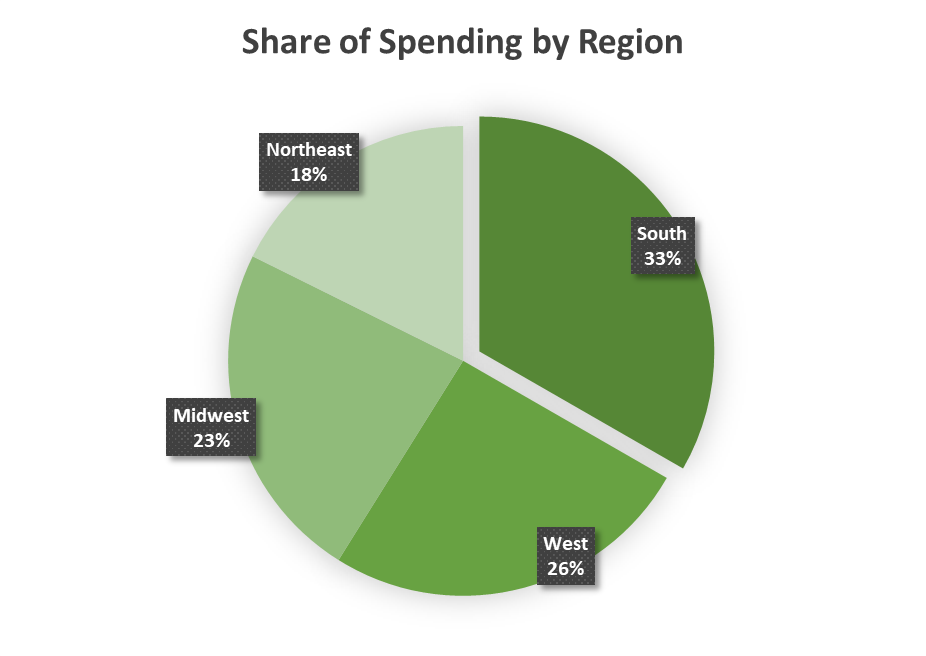


### 3. Activity Customer flag
Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [9]:
# create the low activity flag
insta_cleaned.loc[insta_cleaned['max_order'] <5, 'activity'] = 'low-activity customer'

In [ ]:
# how many low-activity customers? - 1,440,295
insta_cleaned['activity'].value_counts()

In [10]:
# create a new data frame 'insta_filterd' that exclude low-activity customers. 
insta_filtered = insta_cleaned[insta_cleaned['activity'] != 'low-activity customer']

In [10]:
insta_filtered.shape

(30964564, 35)

In [12]:
insta_filtered['activity'].value_counts()

activity
nan    30964564
Name: count, dtype: int64

In [11]:
#export the new data frame excluding low-activity customers. 
insta_filtered.to_pickle(os.path.join(path, '02 Data\Prepared Data\insta_filtered.pkl'))

### 4. Customer profile
Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.   
You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

## How to  profile customer? 
1.  Categorizing customers by following 4 criteria
 1) age - young / middle / elder
 2) income - low / middle / high
 3) family status - married / non-married

2. link customer profile to 
 1) department_id
 2) which item in the top 3 department
 3) spending (the sum of 'prices' records)

In [67]:
#due to memory issue, I re-started from here with new dataframe 'insta_filtered.pkl'
insta_filtered=pd.read_pickle(os.path.join(path, '02 Data\Prepared Data\insta_filtered.pkl'))

 ### 4-1) age - young(11) / middle(12) / elder(13) 

In [80]:
# how define each category?
insta_filtered['Age'].describe()

count   30,964,564.00
mean            49.47
std             18.49
min             18.00
25%             33.00
50%             49.00
75%             65.00
max             81.00
Name: Age, dtype: float64

In [68]:
insta_filtered.loc[insta_filtered['Age'] >=65, 'Age_category'] =13

In [69]:
insta_filtered.loc[insta_filtered['Age'] <33, 'Age_category'] =11

In [70]:
insta_filtered['Age_category'].unique()

array([11., 13., nan])

In [71]:
insta_filtered.loc[insta_filtered['Age_category'].isna(), 'Age_category'] = 12

In [74]:
insta_filtered['Age_category'].value_counts()

Age_category
12    15483886
13     8195544
11     7285134
Name: count, dtype: int64

In [73]:
# changing data type to int8 
insta_filtered['Age_category']=insta_filtered['Age_category'].astype('int8')

### 4-2) Income - Low(21) / Mid(22) / High(23)

In [76]:
insta_filtered['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [77]:
insta_filtered.loc[insta_filtered['income'] >=128102, 'income_category'] ='23'

In [78]:
insta_filtered.loc[insta_filtered['income'] <67292, 'income_category'] ='21'

In [79]:
insta_filtered.loc[insta_filtered['income_category'] =='na', 'income_category'] = '22'

In [80]:
insta_filtered['income_category'].value_counts()

income_category
22    15482298
23     7741261
21     7741005
Name: count, dtype: int64

In [96]:
insta_filtered['income_category'].shape

(30964564,)

In [81]:
# changing data type to int8 
insta_filtered['income_category']=insta_filtered['income_category'].astype('int8')

### 4-3) Family Status - Married 31 / Non-married 32

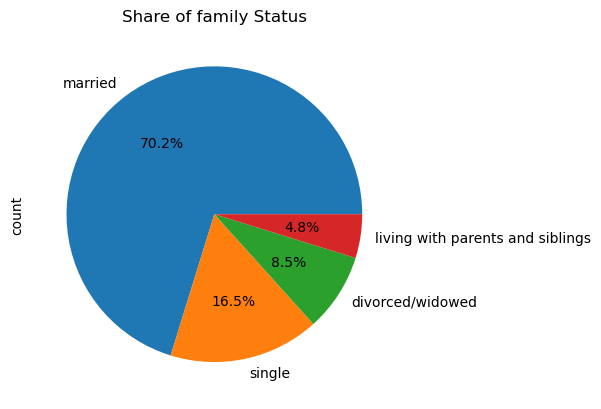

In [97]:
# pie chart - 'Share of family status'
pie_fam_status = insta_filtered['fam_status'].value_counts().plot.pie(autopct='%1.1f%%', title='Share of family Status')

In [82]:
insta_filtered.loc[insta_filtered['fam_status']  == 'married', 'Family_category'] ='31'

In [83]:
insta_filtered.loc[insta_filtered['Family_category']  == 'na', 'Family_category'] ='32'

In [84]:
insta_filtered['Family_category'].shape

(30964564,)

In [85]:
insta_filtered['Family_category'].value_counts()

Family_category
31    21743711
32     9220853
Name: count, dtype: int64

In [86]:
# changing data type to int8 
insta_filtered['Family_category']=insta_filtered['Family_category'].astype('int8')

### 4-4) customer profile - age+income+marriage

In [87]:
import pandas as pd
from itertools import product


# Define mappings for each category
age_mapping = {11: 'Young', 12: 'Middle', 13: 'Elder'}
income_mapping = {21: 'Low', 22: 'Mid', 23: 'High'}
family_mapping = {31: 'Married', 32: 'Non-Married'}

# Generate all combinations
age_categories = insta_filtered['Age_category'].unique()
income_categories = insta_filtered['income_category'].unique()
family_categories = insta_filtered['Family_category'].unique()
all_combinations = product(age_categories, income_categories, family_categories)

# Create 'customer_profile' column
insta_filtered['customer_profile'] = ''

for combination in all_combinations:
    age, income, family = combination
    filter_condition = (insta_filtered['Age_category'] == age) & \
                       (insta_filtered['income_category'] == income) & \
                       (insta_filtered['Family_category'] == family)
    insta_filtered.loc[filter_condition, 'customer_profile'] = f'{age_mapping[age]}_{income_mapping[income]}_{family_mapping[family]}'



In [88]:
insta_filtered['customer_profile'].value_counts()

customer_profile
Middle_Mid_Married         5737865
Middle_High_Married        3366928
Elder_Mid_Married          3003430
Middle_Low_Married         2478126
Elder_High_Married         2366940
Young_Mid_Married          2076619
Middle_Mid_Non-Married     1915831
Young_Low_Married          1865367
Young_Mid_Non-Married      1748087
Young_Low_Non-Married      1512981
Middle_High_Non-Married    1154716
Elder_Mid_Non-Married      1000466
Middle_Low_Non-Married      830420
Elder_Low_Married           803216
Elder_High_Non-Married      770597
Elder_Low_Non-Married       250895
Young_High_Married           45220
Young_High_Non-Married       36860
Name: count, dtype: int64

In [89]:
insta_filtered['customer_profile'].shape

(30964564,)

### 5. Customer profile and department
link customer profile to Top 3 department_id

In [8]:
top_departments = (insta_filtered.groupby('customer_profile')['department_id']
                    .apply(lambda x: x.value_counts().nlargest(3).index.tolist())
                    .reset_index(name='top_department_ids'))

In [9]:
top_departments

,customer_profile,top_department_ids
0,Elder_High_Married,"[4, 16, 7]"
1,Elder_High_Non-Married,"[4, 16, 7]"
2,Elder_Low_Married,"[4, 19, 16]"
3,Elder_Low_Non-Married,"[4, 19, 16]"
4,Elder_Mid_Married,"[4, 16, 19]"
5,Elder_Mid_Non-Married,"[4, 16, 7]"
6,Middle_High_Married,"[4, 16, 7]"
7,Middle_High_Non-Married,"[4, 16, 7]"
8,Middle_Low_Married,"[4, 16, 19]"
9,Middle_Low_Non-Married,"[4, 16, 19]"


In [12]:
#copy result to clipboard for Excel. 
top_departments.to_clipboard()

#### finding
 - The most-selling department is 4 (produced) following by 16 (dairy eggs) , 7 (beverage), 19 (snaks). 
  -  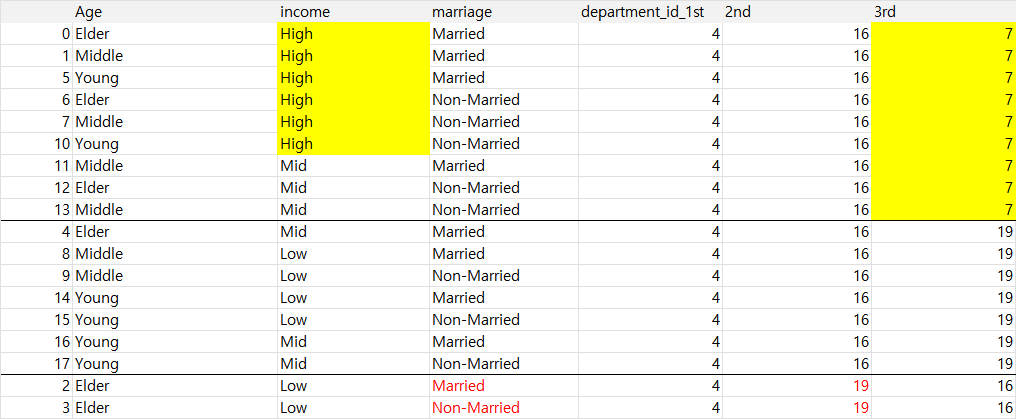
  - High income customers spend more for 7. beverage 
  - In the only Low-income Elder group, the second selling department is 19. snaks, they probably need more 16. dairy eggs, because Elder group with mid and high income consume more 16. dairy eggs
  
   - recommendations: 
      1) enalarge the variety of beverages, High and mid income group have preference for beverage. 
       2) Specific marketing about dairy egg For the health of low-income Elder group, it could be social responsibilty of the company. 

### 
link customer profile to Top 3 day of week

In [10]:
top_days = (insta_filtered.groupby('customer_profile')['order_day_of_week']
                    .apply(lambda x: x.value_counts().nlargest(3).index.tolist())
                    .reset_index(name='top_order_day_of_week'))

In [11]:
top_days

,customer_profile,top_order_day_of_week
0,Elder_High_Married,"[0, 1, 6]"
1,Elder_High_Non-Married,"[0, 1, 6]"
2,Elder_Low_Married,"[1, 0, 2]"
3,Elder_Low_Non-Married,"[1, 0, 5]"
4,Elder_Mid_Married,"[0, 1, 6]"
5,Elder_Mid_Non-Married,"[0, 1, 6]"
6,Middle_High_Married,"[0, 1, 6]"
7,Middle_High_Non-Married,"[0, 1, 6]"
8,Middle_Low_Married,"[1, 0, 2]"
9,Middle_Low_Non-Married,"[1, 0, 5]"


In [14]:
#copy result to clipboard for Excel. 
top_days.to_clipboard()

#### findings
 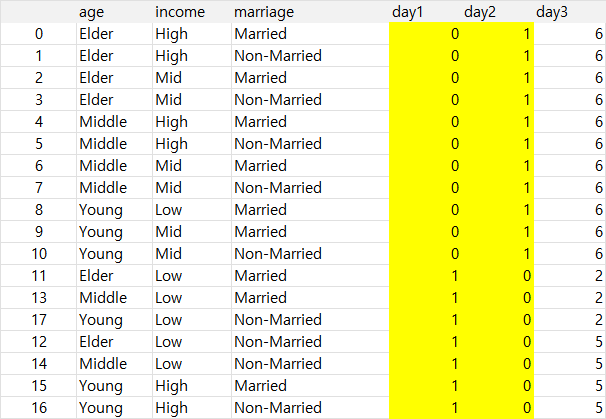
   - all customers visit mostly weekend (0: Saturday, 1: Sunday, 6: Friday / 2: Monday, 5: Thursday)
    
   - Recommendation: focus on weekend, from Friday to Sunday. 

## 6. Distributions by profiles
Create an appropriate visualization to show the distribution of profiles.

#### distribution of customer profile 

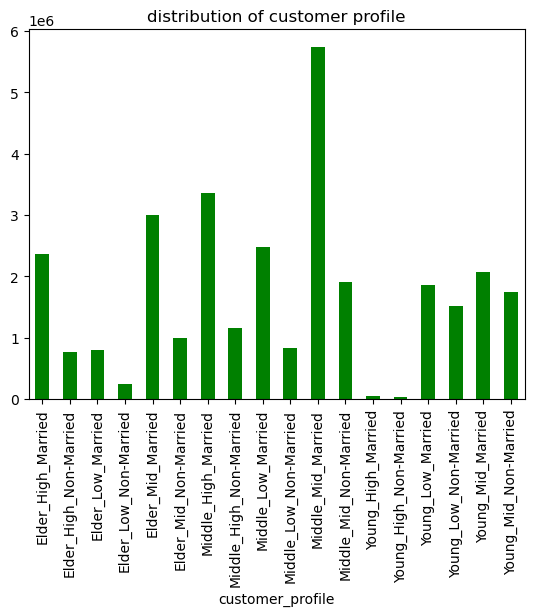

In [19]:
plt.title('distribution of customer profile')
bar_profile=insta_filtered['customer_profile'].value_counts().sort_index().plot.bar(color='green')


In [20]:
bar_profile.figure.savefig(os.path.join(path,'04 Analysis/Visualizations/bar_profile.png'))

#### distribution by income

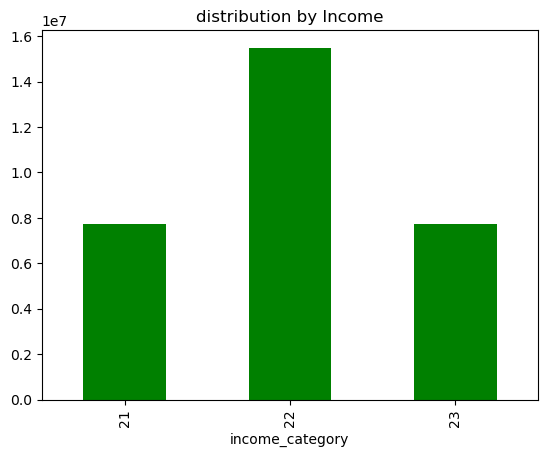

In [21]:
plt.title('distribution by Income')
bar_income_distribution=insta_filtered['income_category'].value_counts().sort_index().plot.bar(color='green')
bar_income_distribution.figure.savefig(os.path.join(path,'04 Analysis/Visualizations/bar_income_distribution.png'))

#### distribution by Age

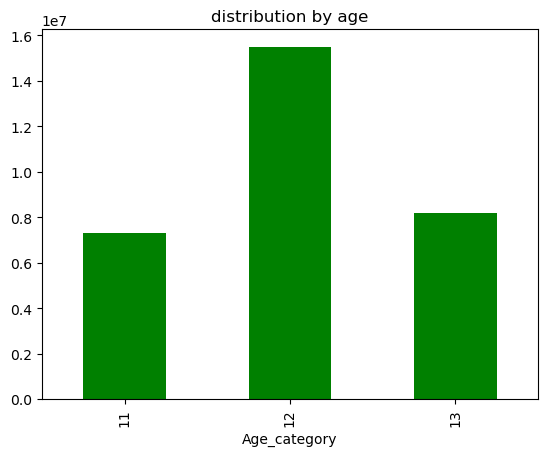

In [23]:
plt.title('distribution by age')
bar_age_distribution=insta_filtered['Age_category'].value_counts().sort_index().plot.bar(color='green')
bar_age_distribution.figure.savefig(os.path.join(path,'04 Analysis/Visualizations/bar_age_distribution.png'))

#### findings
  - The customers who are middle ages, mid-incom, married are the largest number. 
     ** Largest Number of customer by profile
    1) Middle ages, Mid-incom, Married  
    2) Middle ages, High-income, Married
    3) Elder, Mid-income, Married
    
     ** Lowest Number of customer by profile
      1) Yong, High-income, Non Married
      2) Young, High-income, Married
      3) Elder, Low-income, Non Married
   
    - Findings
     1) Middle age are largest customer class
      2) The number of Young mid-low incomes are quite large number regardless marriage

## 7. Customer profile and expenditure 
Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

### max, mean, min of usage frequency

In [90]:
frequency_profile=insta_filtered.groupby('customer_profile').agg({'days_since_previous_order':['mean', 'min', 'max']})

In [91]:
frequency_profile

days_since_previous_order        
                                             mean min max
customer_profile                                         
Elder_High_Married                      10.136327   0  30
Elder_High_Non-Married                  10.167378   0  30
Elder_Low_Married                       10.400368   0  30
Elder_Low_Non-Married                   10.647877   0  30
Elder_Mid_Married                       10.232782   0  30
Elder_Mid_Non-Married                   10.095151   0  30
Middle_High_Married                     10.263653   0  30
Middle_High_Non-Married                 10.097084   0  30
Middle_Low_Married                      10.368403   0  30
Middle_Low_Non-Married                  10.292143   0  30
Middle_Mid_Married                      10.168431   0  30
Middle_Mid_Non-Married                  10.183559   0  30
Young_High_Married                       9.803450   0  30
Young_High_Non-Married                   9.333451   0  30
Young_Low_Married                       10.311433   0  30
Young_Low_Non-Married                   10.355548   0  30
Young_Mid_Married                       10.254210   0  30
Young_Mid_Non-Married                   10.180040   0  30

In [94]:
frequency_profile.to_clipboard()

#### finding   
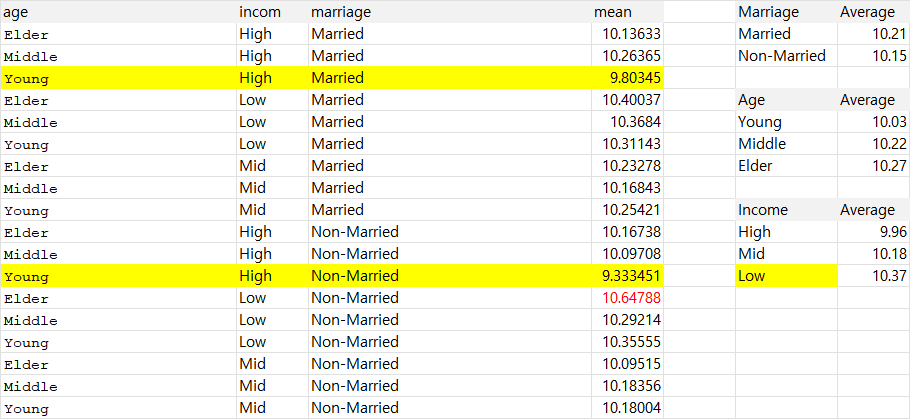
  - Young, high income, non-married customers visit most often by every 9.33 days. 
  - Overall, the difference of frequency by customer profile is at most 1 day. 

### sum, max, mean, min of expenditure

In [96]:
expend_profile=insta_filtered.groupby('customer_profile').agg({'prices':['sum', 'mean', 'min', 'max']})

In [99]:
expend_profile

prices                     
                                sum      mean  min   max
customer_profile                                        
Elder_High_Married       18837975.3  7.961564  1.0  25.0
Elder_High_Non-Married    6121027.6  7.946569  1.0  25.0
Elder_Low_Married         5388175.0  6.708252  1.0  25.0
Elder_Low_Non-Married     1686413.7  6.721592  1.0  25.0
Elder_Mid_Married        23889698.1  7.954398  1.0  25.0
Elder_Mid_Non-Married     7965076.5  7.961605  1.0  25.0
Middle_High_Married      26763230.3  7.952681  1.0  25.0
Middle_High_Non-Married   9161218.5  7.937014  1.0  25.0
Middle_Low_Married       17823660.4  7.192398  1.0  25.0
Middle_Low_Non-Married    5959664.6  7.176696  1.0  25.0
Middle_Mid_Married       45636769.3  7.953948  1.0  25.0
Middle_Mid_Non-Married   15264141.7  7.967702  1.0  25.0
Young_High_Married         345606.7  7.736886  1.0  25.0
Young_High_Non-Married     286578.5  7.846951  1.0  25.0
Young_Low_Married        14160476.8  7.591267  1.0  25.0
Young_Low_Non-Married    11494175.9  7.597039  1.0  25.0
Young_Mid_Married        16516619.9  7.954281  1.0  25.0
Young_Mid_Non-Married    13893726.8  7.948493  1.0  25.0

In [98]:
expend_profile.to_clipboard()

#### finding  		
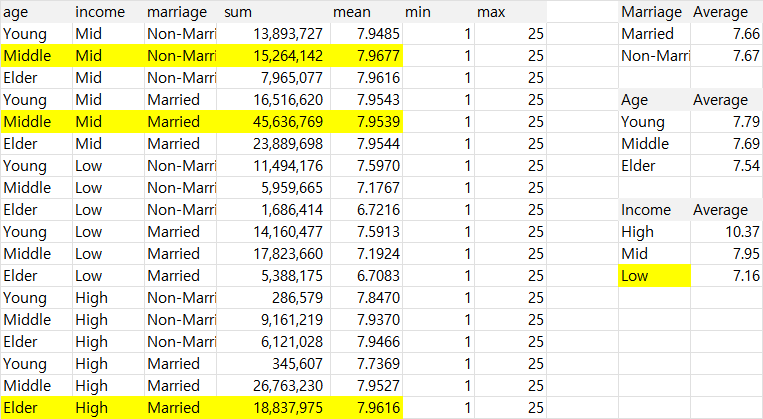
  - Middle age mid-income non-married cutomer spend most on average, and Elder, Low-income customers are least. 
   - except other conditions, High income customers spend 10.37 on average, while Low-income customers spend 7.16
   - The number of married customer takes 70%, but the average expenditure is almost same as non-married (7.66 vs 7.77)

## 8. Customer profile with regions and department
Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [8]:
region_profile=insta_filtered[['Region', 'Age_category', 'income_category', 'Family_category','customer_profile']]

<Figure size 1200x800 with 0 Axes>

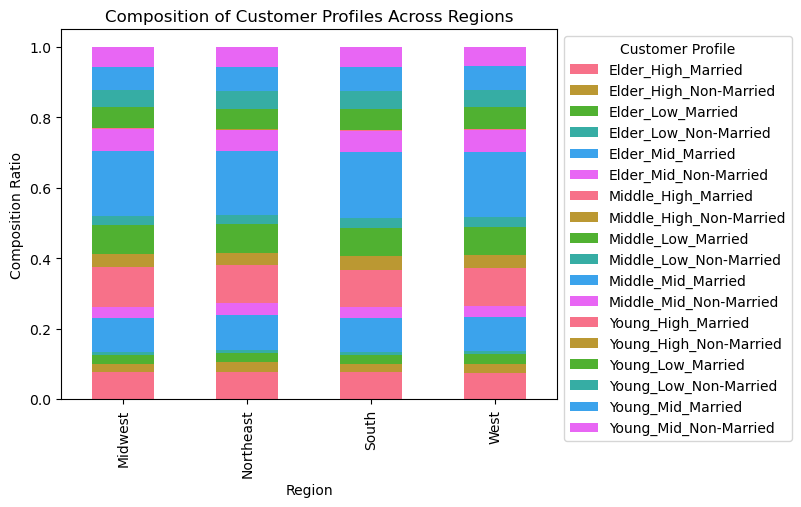

In [120]:
# Create a DataFrame with proportions
df_proportions = region_profile.groupby(['Region', 'customer_profile']).size().unstack().div(region_profile.groupby('Region').size(), axis=0)

# Plotting
plt.figure(figsize=(12, 8))
sns.set_palette("husl")  # Set color palette

df_proportions.plot(kind='bar', stacked=True)
plt.title('Composition of Customer Profiles Across Regions')
plt.xlabel('Region')
plt.ylabel('Composition Ratio')
plt.legend(title='Customer Profile', bbox_to_anchor=(1, 1))

plt.show()

In [31]:
re_profile = region_profile.groupby('Region')['customer_profile'].value_counts()


In [28]:
re_profile

customer_profile        Region   
Elder_High_Married      South        788143
                        West         598357
                        Midwest      553685
                        Northeast    426755
Elder_High_Non-Married  South        249624
                                      ...  
Young_Mid_Married       Northeast    370826
Young_Mid_Non-Married   South        595771
                        West         419912
                        Midwest      417415
                        Northeast    314989
Name: count, Length: 72, dtype: int64

In [32]:
re_age_percentage_table = region_profile.groupby('Region')['customer_profile'].value_counts(normalize=True).unstack() * 100


In [33]:
re_age_percentage_table

customer_profile,Elder_High_Married,Elder_High_Non-Married,Elder_Low_Married,Elder_Low_Non-Married,Elder_Mid_Married,Elder_Mid_Non-Married,Middle_High_Married,Middle_High_Non-Married,Middle_Low_Married,Middle_Low_Non-Married,Middle_Mid_Married,Middle_Mid_Non-Married,Young_High_Married,Young_High_Non-Married,Young_Low_Married,Young_Low_Non-Married,Young_Mid_Married,Young_Mid_Non-Married
Region,,,,,,,,,,,,,,,,,,
Midwest,7.624926,2.369947,2.458455,0.788637,9.664088,3.315012,11.249818,3.891173,8.018370,2.684496,18.284881,6.432530,0.118309,0.111065,6.108837,4.600942,6.530196,5.748320
Northeast,7.809325,2.674628,2.657408,0.913978,9.771725,3.343889,10.987019,3.390497,8.104969,2.541684,18.405947,5.789977,0.151518,0.109009,5.847638,4.950843,6.785862,5.764083
South,7.643608,2.420916,2.589442,0.776946,9.655383,3.181036,10.543743,3.811509,8.062368,2.744246,18.740073,6.076147,0.151652,0.152001,5.975150,5.001543,6.696302,5.777936
West,7.548125,2.557250,2.680319,0.801920,9.739812,3.141225,10.879403,3.707072,7.841809,2.694852,18.568460,6.380642,0.160359,0.090385,6.132182,4.952791,6.826309,5.297086


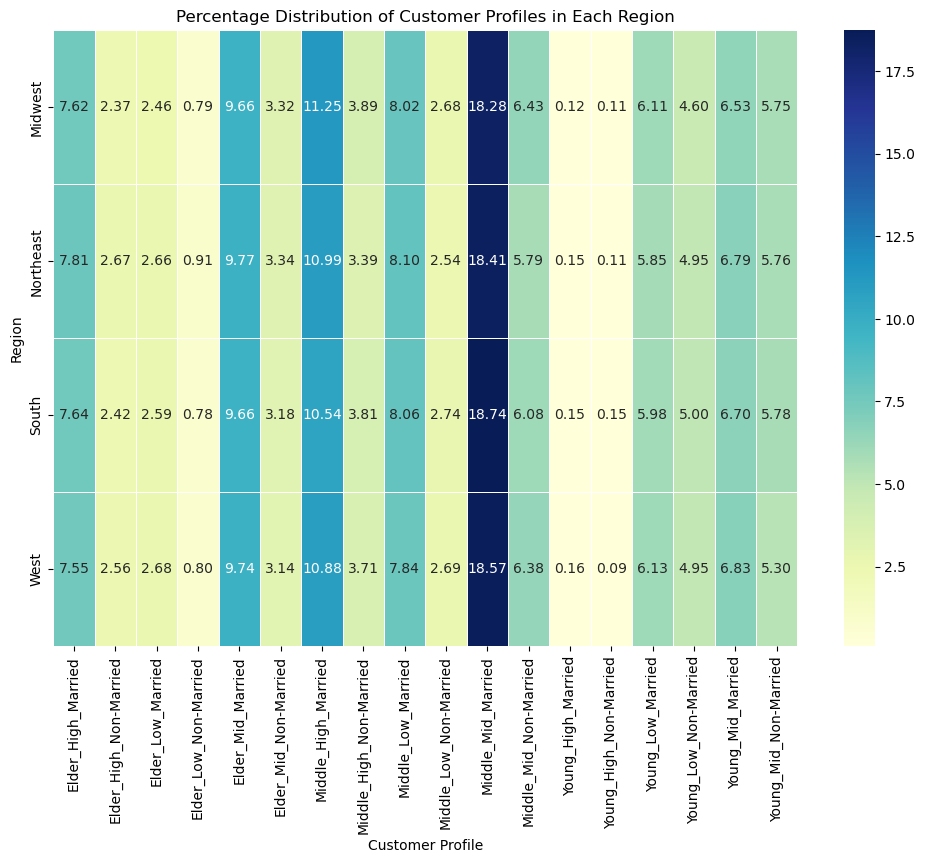

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(re_age_percentage_table, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title('Percentage Distribution of Customer Profiles in Each Region')
plt.xlabel('Customer Profile')
plt.ylabel('Region')
plt.savefig(os.path.join(path, '04 Analysis/Visualizations/region_profile.png'))

plt.show()

#### finding
  - As we can see from the graph, the distribution of cutomer profile in each region is almost same. We cannot find any significant difference. 


In [55]:
profile_departments =insta_filtered[['order_id', 'user_id', 'department_id', 'prices', 'customer_profile']]

In [56]:
profile_departments

,order_id,user_id,department_id,prices,customer_profile
0,2539329,1,7,9.0,Young_Low_Married
1,2398795,1,7,9.0,Young_Low_Married
2,473747,1,7,9.0,Young_Low_Married
3,2254736,1,7,9.0,Young_Low_Married
4,431534,1,7,9.0,Young_Low_Married
...,...,...,...,...,...
32404850,3308056,106143,7,10.7,Young_Low_Non-Married
32404851,2988973,106143,7,10.7,Young_Low_Non-Married
32404852,930,106143,7,10.7,Young_Low_Non-Married
32404853,467253,106143,7,10.7,Young_Low_Non-Married


C:\Users\jinu5\AppData\Local\Temp\ipykernel_19624\1900061765.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='department_id', y='prices', hue='customer_profile', data=profile_departments, ci=None)


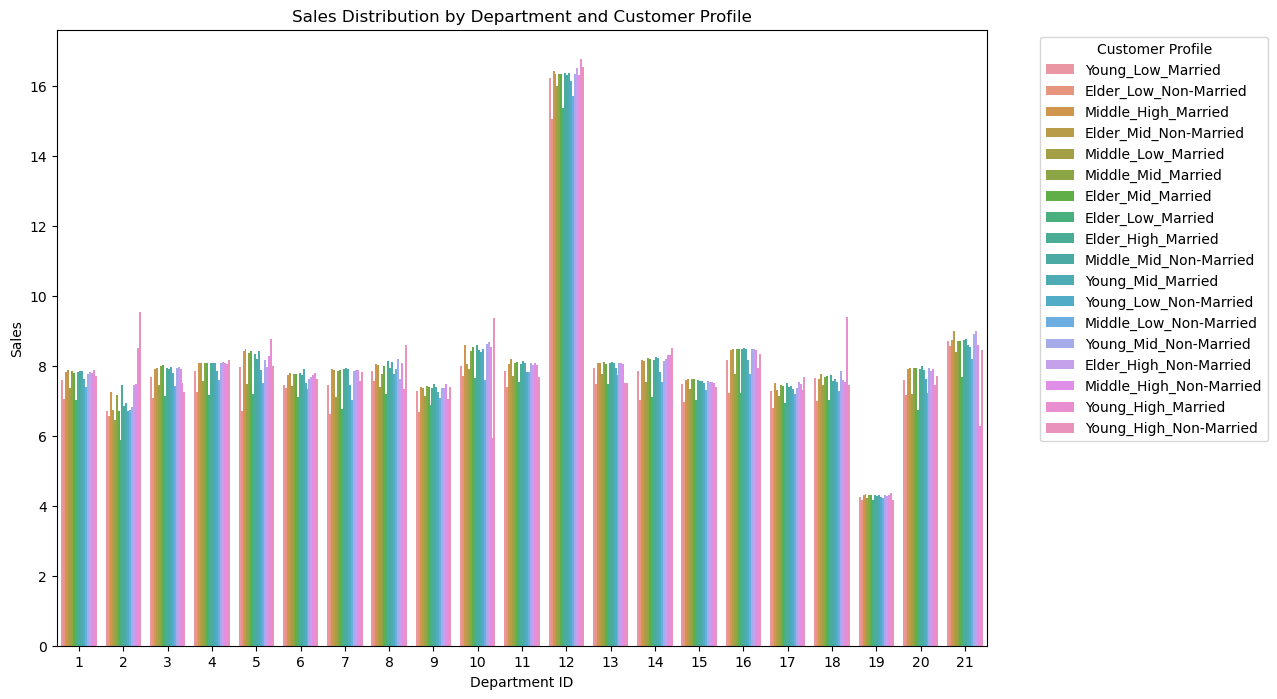

In [59]:
    plt.figure(figsize=(12, 8))
    sns.barplot(x='department_id', y='prices', hue='customer_profile', data=profile_departments, ci=None)
    plt.title('Sales Distribution by Department and Customer Profile')
    plt.xlabel('Department ID')
    plt.ylabel('Sales')
    plt.legend(title='Customer Profile', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Save the plot to a file (e.g., in PNG format)
    plt.savefig(os.path.join(path, '04 Analysis/Visualizations/sale_profile.png'))

    # Display the plot
    plt.show()

### finding
   - Depending on the customer profile, departmental pricing does not vary significantly.

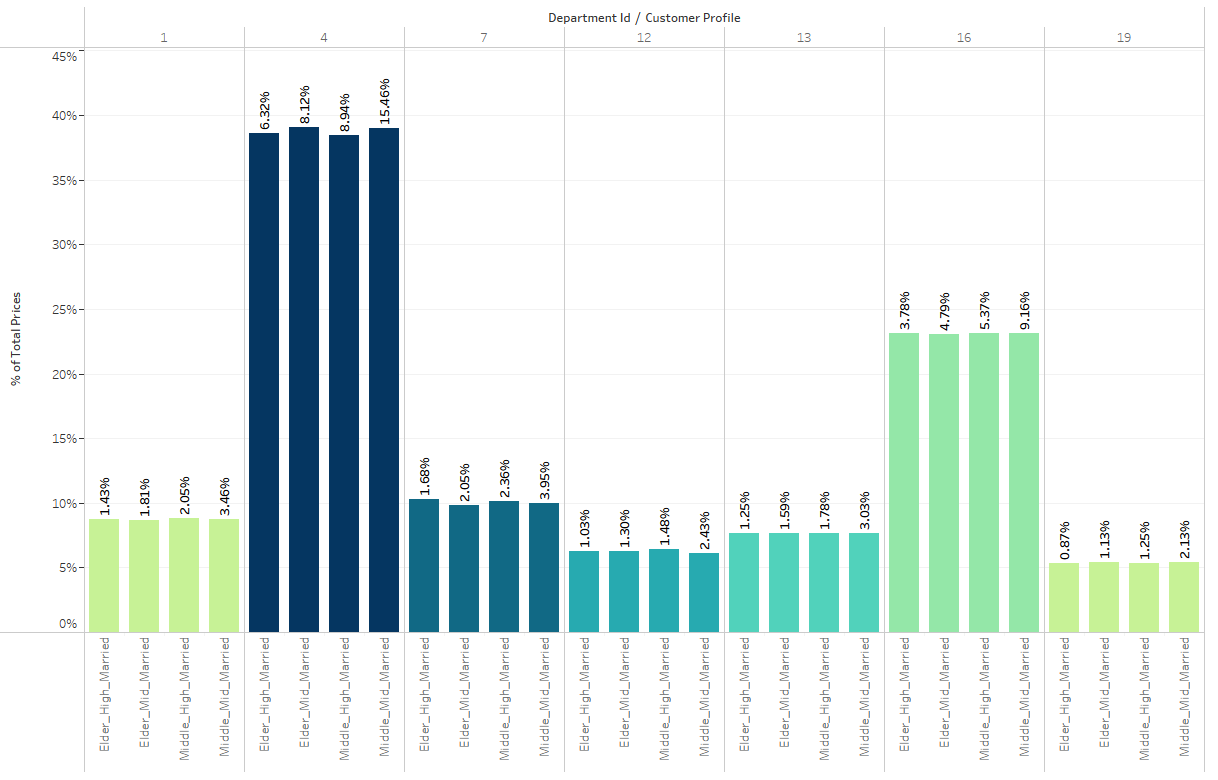

## 9. Exporting dataframe for Tableau
Due to Memory issue, export date frame 'insta_filtered' and sub-data frame for checking customer profile.`

In [98]:
insta_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404854
Data columns (total 38 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   order_id                   int32  
 1   user_id                    int32  
 2   order_number               int8   
 3   order_day_of_week          int8   
 4   order_hour_of_day          int8   
 5   days_since_previous_order  int8   
 6   product_id                 int32  
 7   add_to_cart_order          int32  
 8   reordered                  int32  
 9   product_name               object 
 10  aisle_id                   int8   
 11  department_id              int32  
 12  prices                     float64
 13  price_range_loc            object 
 14  busiest_day                object 
 15  busiest_days               object 
 16  busiest_period_of_day      object 
 17  max_order                  int8   
 18  loyalty_flag               object 
 19  average_spending           float16
 20  spend

In [11]:
sub_insta = insta_filtered[['order_id', 
                            'user_id', 
                            'order_day_of_week', 
                            'order_hour_of_day', 
                            'department_id',
                            'product_id',
                            'days_since_previous_order',
                            'prices',
                            'n_dependants',
                            'income',
                            'loyalty_flag',
                            'Region',
                            'Age_category',
                            'income_category',
                            'Family_category',
                            'customer_profile' ]]

In [12]:
sub_insta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404854
Data columns (total 16 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   order_id                   int32  
 1   user_id                    int32  
 2   order_day_of_week          int8   
 3   order_hour_of_day          int8   
 4   department_id              int32  
 5   product_id                 int32  
 6   days_since_previous_order  int8   
 7   prices                     float64
 8   n_dependants               int8   
 9   income                     int32  
 10  loyalty_flag               object 
 11  Region                     object 
 12  Age_category               int8   
 13  income_category            int8   
 14  Family_category            int8   
 15  customer_profile           object 
dtypes: float64(1), int32(5), int8(7), object(3)
memory usage: 1.9+ GB


In [13]:
# create a sampling dataset for test a profiling
np.random.seed(4)
dev = np.random.rand(len(sub_insta))<=0.7
small=sub_insta[~dev]

In [14]:
small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9288468 entries, 0 to 32404851
Data columns (total 16 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   order_id                   int32  
 1   user_id                    int32  
 2   order_day_of_week          int8   
 3   order_hour_of_day          int8   
 4   department_id              int32  
 5   product_id                 int32  
 6   days_since_previous_order  int8   
 7   prices                     float64
 8   n_dependants               int8   
 9   income                     int32  
 10  loyalty_flag               object 
 11  Region                     object 
 12  Age_category               int8   
 13  income_category            int8   
 14  Family_category            int8   
 15  customer_profile           object 
dtypes: float64(1), int32(5), int8(7), object(3)
memory usage: 593.5+ MB


In [65]:
insta_filtered.to_pickle(os.path.join(path, '02 Data/Prepared Data/insta_filtered.pkl'))

In [ ]:
small.to_pickle(os.path.join(path, '02 Data/Prepared Data/small.pkl'))

In [15]:
# export by csv for Tableau
small.to_csv(os.path.join(path, '02 Data/Prepared Data/small.csv'))